## EigenModeSource

Lineárny alebo plošný zdroj [EigenMode Source](https://meep.readthedocs.io/en/latest/Python_User_Interface/#eigenmodesource) produkuje plošnú vlnu a umožnuje simulovať budenie mikropáskových vedení alebo vlnovodov. Tvar vlny je možné definovať pomocou štandardných typov zdrojov (Custom, Gaussian, Continuous).

-----------
Initializing structure...
run 0 finished at t = 50.0 (200 timesteps)


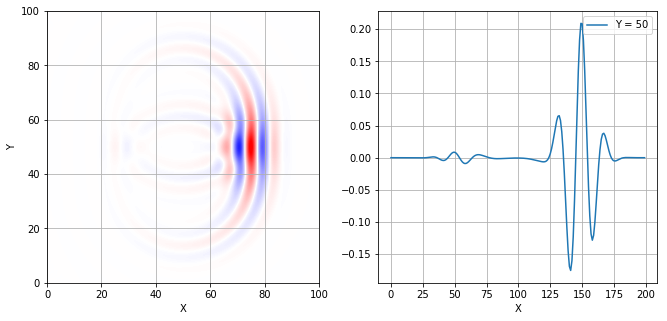

In [2]:
%reset -f 
%matplotlib inline
import meep as mp 
import matplotlib.pyplot as plt
from utils.utils import src_plot

dx = 100
dy = 100
area = mp.Vector3(dx, dy, 0)

sources = [mp.EigenModeSource(src=mp.GaussianSource(.1, width=5),
                center=mp.Vector3(0,0,0),
                size=mp.Vector3(y=25), 
                direction=mp.AUTOMATIC)]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                geometry=[], sources=sources, resolution=2)

sim.reset_meep() 
sim.run(until=50)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)
src_plot(dx, dy, data.transpose())